# Import Necessary Libraries

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/snehuuu28/DC-InfoTech/main/Week%204%3A%20Unsupervised%20Learning/mall-customers-data.csv")

In [4]:
# Check the first few rows to ensure it's loaded
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

# EDA

In [7]:
df.isnull().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.describe()

,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Data Preprocessing

In [11]:
# Drop customer_id column since it's not relevant for clustering
df = df.drop('customer_id', axis=1)

In [12]:
# Initialize the Label Encoder
le = LabelEncoder()

# Convert gender column to numerical format
df['gender'] = le.fit_transform(df['gender'])  # Male=1, Female=0

In [13]:
df.head()

,gender,age,annual_income,spending_score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# Normalize the data

In [15]:

# Initialize the Standard Scaler
scaler = StandardScaler()

# Normalize the features
scaled_data = scaler.fit_transform(df[['age', 'annual_income', 'spending_score']])

# Convert back to DataFrame (optional, for better understanding)
scaled_df = pd.DataFrame(scaled_data, columns=['age', 'annual_income', 'spending_score'])
scaled_df.head()


,age,annual_income,spending_score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


# Apply K-Means Clustering

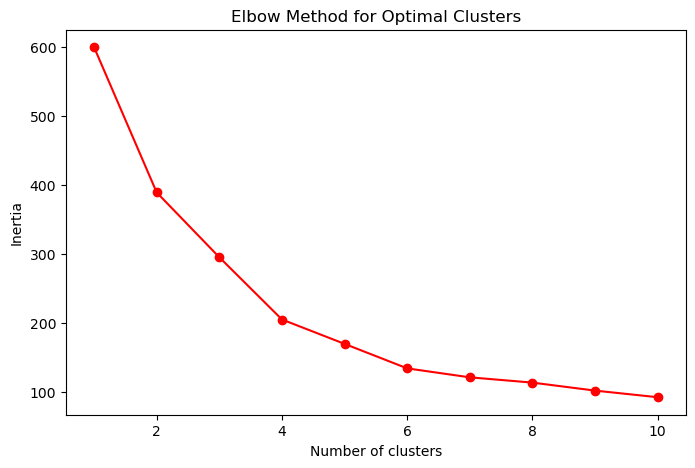

In [17]:
# Find the optimal number of clusters using the elbow method
inertia = []
K = range(1, 11)  # We will try 1 to 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the elbow method results
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-', color='red')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


In [18]:
# Initialize KMeans with the optimal number of clusters (let's say it's 5)
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit and predict clusters
df['cluster'] = kmeans.fit_predict(scaled_df)

# Check the assigned clusters
print(df.head())


   gender  age  annual_income  spending_score  cluster
0       1   19             15              39        2
1       1   21             15              81        2
2       0   20             16               6        3
3       0   23             16              77        2
4       0   31             17              40        2


# Analyze and Evaluate the Results

In [20]:
# Get cluster centers (in the original scale)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Create a DataFrame for easy interpretation
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['age', 'annual_income', 'spending_score'])

# Print the cluster centers
print(cluster_centers_df)


         age  annual_income  spending_score
0  55.275862      47.620690       41.706897
1  32.875000      86.100000       81.525000
2  25.769231      26.115385       74.846154
3  26.733333      54.311111       40.911111
4  44.387097      89.774194       18.483871


In [21]:
# Count the number of customers in each cluster
print(df['cluster'].value_counts())


cluster
0    58
3    45
1    40
4    31
2    26
Name: count, dtype: int64


# Analyze and Evaluate the Results

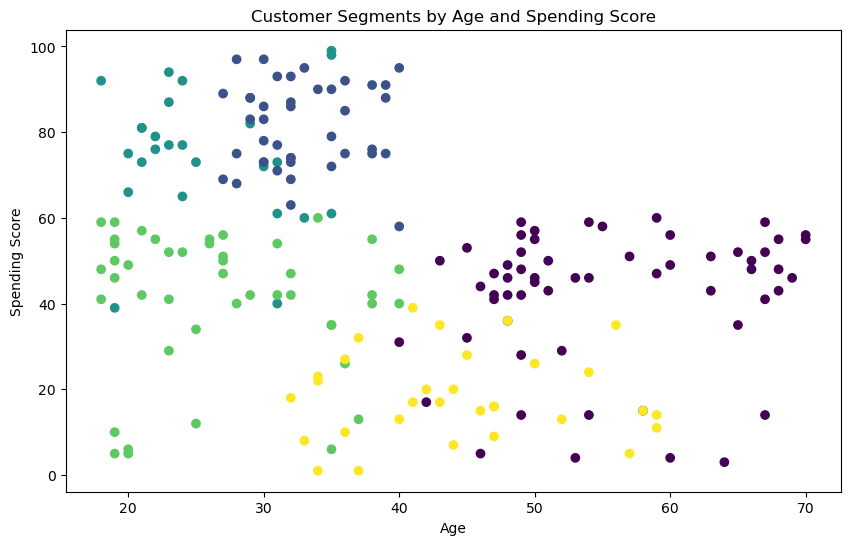

In [23]:
plt.figure(figsize=(10, 6))

# Scatter plot for two dimensions
plt.scatter(df['age'], df['spending_score'], c=df['cluster'], cmap='viridis')

plt.title('Customer Segments by Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()


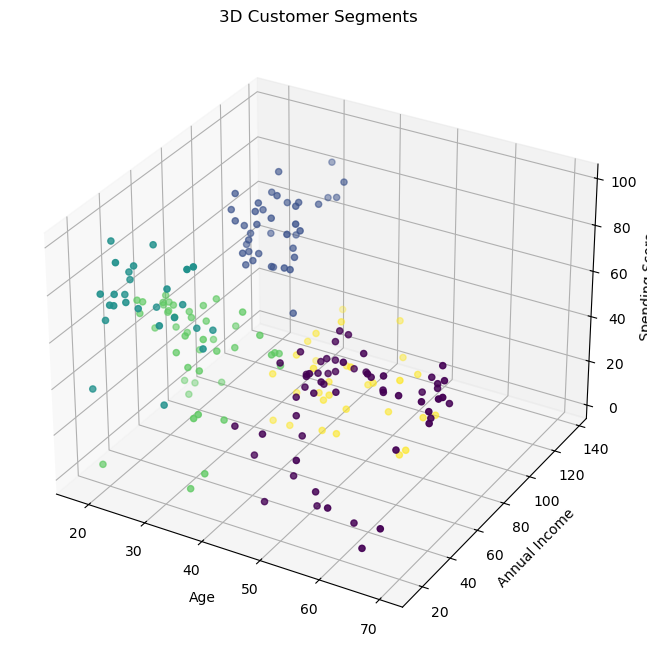

In [43]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D Scatter plot
ax.scatter(df['age'], df['annual_income'], df['spending_score'], c=df['cluster'], cmap='viridis')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')

plt.title('3D Customer Segments')
plt.show()
